Created by: Aslamic Adika $\\$
date      : 2022-08-30 19.15

# Principal Analysis Component


### Resource and idea
ide dari PCA ini adalah melihat kontribusi variabel (kolom di dataset) sebanyak $p$ ($p$ dimensi),$\\$
lalu mereduksinya menjadi $k$ dimensi yang lebih kecil (misal menjadi $2\hspace{1mm}\text{dimensi}$) $\\$
sehingga terdapat $k$ variabel baru ($k\hspace{1mm}\text{dimensi}$) dimana $k$ variabel ini adalah dimensi paling minimum $\\$
 yang memberikan kontribusi variansi data terbesar.

untuk lebih detilnya liat lecture: https://www.youtube.com/watch?v=0vbTFaJm3jQ $\\$
more explaination: $\\$ 
https://www.youtube.com/watch?v=FgakZw6K1QQ&t=301s $\\$ 
https://www.youtube.com/watch?v=nu2boMTKOFA $\\$
https://www.youtube.com/watch?v=n7npKX5zIWI $\\$
https://www.youtube.com/watch?v=L-pQtGm3VS8 $\\$
for numerical example : https://www.youtube.com/watch?v=hkCT-6KJAK0 $\\$
https://www.youtube.com/watch?v=MLaJbA82nzk 


In [80]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]

In [82]:
a = np.array([x,y])


In [83]:
df = pd.DataFrame(a.T, columns=['x','y'])
df

,x,y
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


## Data Adjust

StandardScaller, data ke-$z$: $z_i = \frac{x_i - \bar{x}}{s}$ $\\$ $\\$
di mana rata-rata: $\bar{x} = \frac{1}{n}\sum_1^n x_i$ dan standar deviasi sampel: $s = \sqrt{\frac{1}{n-1}\sum_1^n \left(x_i - \bar{x} \right)^2}$

In [84]:
from sklearn.preprocessing import StandardScaler
standar = StandardScaler()


In [85]:
data_stadard = pd.DataFrame(standar.fit_transform(df[['x','y']]), columns= df.columns)
data_stadard 

,x,y
0,0.926279,0.610169
1,-1.758587,-1.506743
2,0.523549,1.232790
3,0.120819,0.361120
4,1.731739,1.357314
5,0.657792,0.983741
6,0.255062,-0.386025
7,-1.087371,-1.008646
8,-0.416154,-0.386025
9,-0.953127,-1.257695


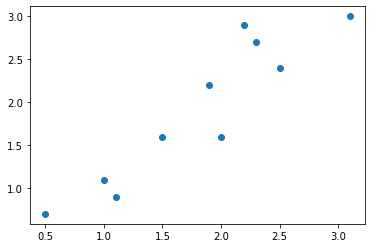

In [86]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

### Calculate the covariance matrix
$\begin{equation}  C = \begin{bmatrix}      C(x,x) & C(x,y) \\ C(y,x) & C(y,y)              \end{bmatrix}\end{equation}$ $\\$
di mana $C(x,y) =  \frac{1}{n-1}\sum_1^n \left(x_i - \bar{x} \right)\left(y_i - \bar{y} \right)  $ $\\$
merupakan covariance matrix sampel

In [87]:
z = np.mean(x)
w = np.mean(y)

In [88]:
df['x_adj'] = df['x'].map(lambda x: x-z)
df['y_adj'] = df['y'].map(lambda d: d-z)
df

,x,y,x_adj,y_adj
0,2.5,2.4,0.69,0.59
1,0.5,0.7,-1.31,-1.11
2,2.2,2.9,0.39,1.09
3,1.9,2.2,0.09,0.39
4,3.1,3.0,1.29,1.19
5,2.3,2.7,0.49,0.89
6,2.0,1.6,0.19,-0.21
7,1.0,1.1,-0.81,-0.71
8,1.5,1.6,-0.31,-0.21
9,1.1,0.9,-0.71,-0.91


(-2.0, 2.0)

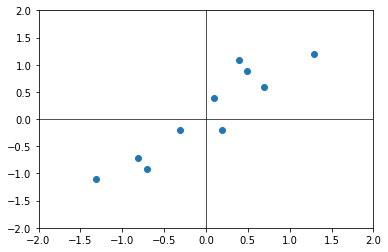

In [89]:
plt.scatter(df.iloc[:,2],df.iloc[:,3],)
plt.xlim(-2,2)
# sns.regplot(df.iloc[:,2],df.iloc[:,3])
plt.axhline(linewidth = 0.68, color = 'black')
plt.axvline(linewidth = 0.68, color = 'black')
plt.ylim(-2,2)

In [90]:
Cov_xy_baru = np.cov(df.iloc[:,2],df.iloc[:,3])
Cov_xy_baru

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [91]:
from numpy import linalg as la

In [92]:
eigen_val, eigen_vec = la.eig(Cov_xy_baru)
eigen_val

array([0.0490834 , 1.28402771])

In [93]:
eigen_vec

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

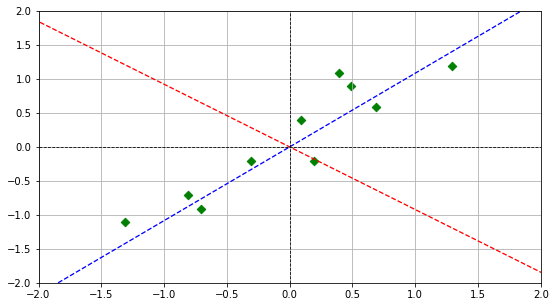

In [94]:

c = np.linspace(-2,2,1000)
plt.figure(figsize=(9,5))
plt.plot(-0.73517866*c/0.6778734,c, ls = '--',color = 'red', linewidth =1.3)
plt.plot(0.6778734*c/0.73517866,c, ls = '--',color = 'blue', linewidth =1.3) #Principal component 1
plt.scatter(df.iloc[:,2],df.iloc[:,3], marker='D',color='green')
plt.grid(True)
plt.axvline(x=0, c="black", label="x=0", ls = '--', linewidth = 0.8)
plt.axhline(y=0, c="black", label="y=0", ls = '--',linewidth = 0.8)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()


Dar gambar di atas, principal component pertama adalah garis biru (eigen value dengan nilai tertinggi). Sehingga sekarang dengan satu garis (1 dimensi) $\\$
kita dapatkan dimensi yang lebih kecil

#### chose feature vector

$feature\hspace{1mm}vector = \left\lbrace \lambda_1,\lambda_2,\lambda_3,\dots, \lambda_p \right\rbrace $ $\\$
where $\lambda_1 \geq \lambda_2 \geq\lambda_3 \geq\dots \geq\lambda_p$

In [95]:
eigen_val

array([0.0490834 , 1.28402771])

In [96]:
eigen_vec

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [97]:
eigen_vec[:,0]

array([-0.73517866,  0.6778734 ])

In [98]:
eigen_vec[:,1]

array([-0.6778734 , -0.73517866])

Since eigen function is $(C-\lambda_1 I)u_1 = 0$, maka kita bisa mengeset elemen eigen vektor  dikali $-1 \\$ agar elemen eigen vektor yang negatif menjadi positif.

mengingat eigen value terbesar adalah $\lambda_1 =  1.28402771$, dengan kontribusi data sebesar: $\\$
$1.28402771/( 1.28402771 + 0.0490834) \approx 96.31\% $, $\lambda_1$ juga membuat eigen vector $u_1 =  \begin{bmatrix}-0.73517866   \\-0.6778734\end{bmatrix} $ atau kita pilih yang elemennya positif $ u_1 =\begin{bmatrix}0.73517866   \\0.6778734\end{bmatrix}$ $\\$ sehingga Principal Component pertama adalah $u_1$

### Deriving new dataset

$Final\hspace{1mm} = u_1^T df[X_{baru}]^T$

#### First principal component

In [99]:
np.matmul(eigen_vec[:,1].T, np.array([df.iloc[0,2],df.iloc[0,3]])) #mengecek satu value di FCP

-0.9014880517555286

In [100]:
# kita bikin loop untuk menghitung setiap nilai di FCP
FCP = []
def fcp(data):
    for i in range(0,len(data)):
        l = np.matmul(eigen_vec[:,1].T, np.array([data.iloc[i,2],data.iloc[i,3]]))
        k = l.item() #convert array to scalar value
        FCP.append(k)
    print('FCP = ', FCP)
    

In [101]:
fcp(df)

FCP =  [-0.9014880517555286, 1.7040624597259884, -1.0657153599693292, -0.34772828152984014, -1.7493192841989806, -0.9864669687132487, 0.025591571944003466, 1.0710542982442193, 0.3645282712080093, 1.1503026895002995]


In [102]:
df['FCP'] = FCP #data dari first principal component

In [103]:
df

,x,y,x_adj,y_adj,FCP
0,2.5,2.4,0.69,0.59,-0.901488
1,0.5,0.7,-1.31,-1.11,1.704062
2,2.2,2.9,0.39,1.09,-1.065715
3,1.9,2.2,0.09,0.39,-0.347728
4,3.1,3.0,1.29,1.19,-1.749319
5,2.3,2.7,0.49,0.89,-0.986467
6,2.0,1.6,0.19,-0.21,0.025592
7,1.0,1.1,-0.81,-0.71,1.071054
8,1.5,1.6,-0.31,-0.21,0.364528
9,1.1,0.9,-0.71,-0.91,1.150303


data FCP adalah data yang tersebar di sepanjangan First Component (yaitu $\lambda_1$ dan $u_1$) $\\$
Menging

In [133]:
from sklearn.decomposition import PCA

In [142]:
x= df.iloc[:, [2,3]]

In [144]:
pca = PCA(n_components=1)
pca.fit(x)

PCA(n_components=1)

In [147]:
print('eigen value', pca.explained_variance_)
print('eigen vector', pca.components_)


eigen value [1.28402771]
eigen vector [[-0.6778734  -0.73517866]]


Hasil di atas sama dengan hasil yang kita peroleh dari perhitungan aljabar linear

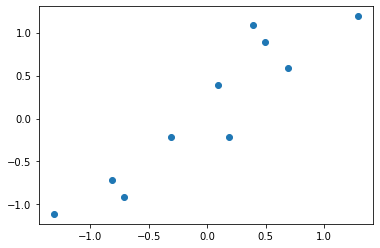

In [158]:
plt.scatter(x.iloc[:,0],x.iloc[:,1])
plt.show()

# Contoh Kedua

In [104]:
Y = np.array([[10,12,11,9,9,10,11,12,11,10,11,12],[100,110,105,94,95,99,104,108,105,98,103,110]])
Y

array([[ 10,  12,  11,   9,   9,  10,  11,  12,  11,  10,  11,  12],
       [100, 110, 105,  94,  95,  99, 104, 108, 105,  98, 103, 110]])

In [105]:
df2 = pd.DataFrame(Y.T, columns=['Sales','Profit'])
df2

,Sales,Profit
0,10,100
1,12,110
2,11,105
3,9,94
4,9,95
5,10,99
6,11,104
7,12,108
8,11,105
9,10,98


In [106]:
df2['Sales_adj'] = df2['Sales'].apply(lambda x: x - np.mean(Y[0]))
df2['Profit_adj'] = df2['Profit'].apply(lambda x: x - np.mean(Y[1]))

In [107]:
df2

,Sales,Profit,Sales_adj,Profit_adj
0,10,100,-0.666667,-2.583333
1,12,110,1.333333,7.416667
2,11,105,0.333333,2.416667
3,9,94,-1.666667,-8.583333
4,9,95,-1.666667,-7.583333
5,10,99,-0.666667,-3.583333
6,11,104,0.333333,1.416667
7,12,108,1.333333,5.416667
8,11,105,0.333333,2.416667
9,10,98,-0.666667,-4.583333


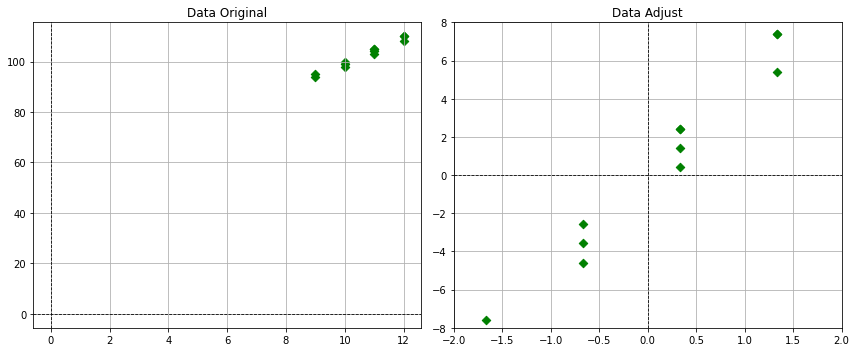

In [108]:
c = np.linspace(-10,10,1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(df2.iloc[:,0],df2.iloc[:,1], marker='D',color='green')
ax1.grid(True)
ax1.axvline(x=0, c="black", label="x=0", ls = '--', linewidth = 0.8)
ax1.axhline(y=0, c="black", label="y=0", ls = '--',linewidth = 0.8)
ax1.set_title('Data Original')

ax2.scatter(df2.iloc[:,2],df2.iloc[:,3], marker='D',color='green')
ax2.grid(True)
ax2.axvline(x=0, c="black", label="x=0", ls = '--', linewidth = 0.8)
ax2.axhline(y=0, c="black", label="y=0", ls = '--',linewidth = 0.8)
ax2.set_title('Data Adjust')
ax2.set_xlim(-2,2)
ax2.set_ylim(-8,8)



plt.tight_layout()
plt.show()


Data adjust dimaksudkan agar sebaran data berada di sekitar titik $O$ dan jarak antar variabel tidak terlalu jauh

## Covariance

In [109]:
# covariance data adjust
C = np.cov(Y)
C

array([[ 1.15151515,  5.75757576],
       [ 5.75757576, 29.53787879]])

In [110]:
#Eigen Value,vector
Eig_val2,  eigen_vec2 = la.eig(C)
Eig_val2

array([2.81670517e-02, 3.06612269e+01])

## Dua sumbu principal komponen: $\\$


$\lambda_1 = 30.6612$, dengan eigen vektor $x_1 \\$
$x_1 = \begin{bmatrix} 0.19149701 \\ 0.9814932 \end{bmatrix}$  $\\$
Tapi karena $(C - \lambda_1 I)x_1 = 0$, dapat kita set $x_1 = \begin{bmatrix} 0.19149701 \\ 0.9814932 \end{bmatrix}$

$\lambda_2 = 0.0281670517$, dengan eigen vektor $x_2 \\$
$x_2 = \begin{bmatrix} 0.9814932 \\-0.19149701 \end{bmatrix}$ 

### Scatter data asli dan adjust

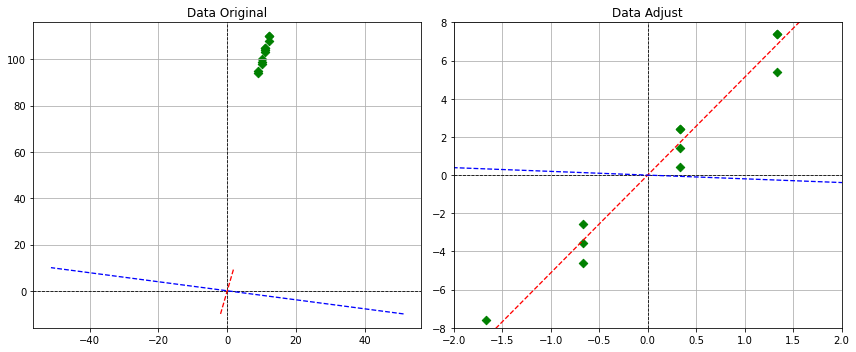

In [111]:

c = np.linspace(-10,10,1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(df2.iloc[:,0],df2.iloc[:,1], marker='D',color='green')
ax1.grid(True)
ax1.axvline(x=0, c="black", label="x=0", ls = '--', linewidth = 0.8)
ax1.axhline(y=0, c="black", label="y=0", ls = '--',linewidth = 0.8)
ax1.plot(0.19149701*c/0.9814932,c, ls = '--',color = 'red', linewidth =1.3) #Principal component 1 
ax1.plot(-0.9814932*c/0.19149701,c, ls = '--',color = 'blue', linewidth =1.3) 
ax1.set_title('Data Original')

ax2.scatter(df2.iloc[:,2],df2.iloc[:,3], marker='D',color='green')
ax2.grid(True)
ax2.axvline(x=0, c="black", label="x=0", ls = '--', linewidth = 0.8)
ax2.axhline(y=0, c="black", label="y=0", ls = '--',linewidth = 0.8)
ax2.plot(0.19149701*c/0.9814932,c, ls = '--',color = 'red', linewidth =1.3) #Principal component 1 
ax2.plot(-0.9814932*c/0.19149701,c, ls = '--',color = 'blue', linewidth =1.3)
ax2.set_title('Data Adjust')
ax2.set_xlim(-2,2)
ax2.set_ylim(-8,8)



plt.tight_layout()
plt.show()
